## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata,study_results, how='outer', on="Mouse ID")

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice: total number mice, number of unique and predicted the number of duplciates:
total_mice_in_combined_df = data_df["Mouse ID"].count()
print(f"\033[43mThe total number of mice (includes duplicates) is: {total_mice_in_combined_df} ")

total_unique_mice_in_combined_df = data_df["Mouse ID"].nunique()
print(f"The total number of UNIQUE mice ID is: {total_unique_mice_in_combined_df} ")

duplicated_ID = total_mice_in_combined_df - total_unique_mice_in_combined_df
print(f"The total number of duplicates mouse ID should be: {total_mice_in_combined_df} - {total_unique_mice_in_combined_df} = {duplicated_ID} \033[0m")

The total number of mice (includes duplicates) is: 1893 
The total number of UNIQUE mice ID is: 249 
The total number of duplicates mouse ID should be: 1893 - 249 = 1644 


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouseID = data_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
duplicated_mouseID = data_df.loc[duplicated_mouseID, :]
duplicated_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = data_df[data_df.duplicated(["Mouse ID"])]
print(f"\033[43mThe total of duplicated 'mouse ID' is: " + str(duplicate_mouse_info[("Mouse ID")].count()) + " \033[0m")
duplicate_mouse_info

The total of duplicated 'mouse ID' is: 1644 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean dataframe by dropping the duplicate mouse by its ID.
data_clean_df = data_df.drop_duplicates(subset="Mouse ID", keep="last")
data_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Display the number of unique mice IDs
data_clean_df["Mouse ID"].count()
print(f"\033[43mThe number of mice with UNIQUE 'mouse ID' is: " + str(data_clean_df["Mouse ID"].count()) + " \033[0m")

The number of mice with UNIQUE 'mouse ID' is: 249 


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = data_clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = data_clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_var = data_clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_std = data_clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = data_clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


In [8]:
# Assemble the resulting series into a single summary dataframe.
groupby_stats_df = pd.DataFrame({"Mean TumorVolume": tumor_mean, 
                              "Median TumorVolume": tumor_median, 
                              "Variance TumorVolume": tumor_var,
                              "STD TumorVolume": tumor_std , 
                              "SEM TumorVolume": tumor_sem})
groupby_stats_df

,Mean TumorVolume,Median TumorVolume,Variance TumorVolume,STD TumorVolume,SEM TumorVolume
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# get dataframe based on Drug Regiment column
stats_data_df = data_clean_df.groupby(['Drug Regimen'])

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = stats_data_df.agg({"Tumor Volume (mm3)": [("Mean","mean"),("Median","median"),("VAR","var"),("STD","std"),("SEM","sem")]})
agg_stats = pd.DataFrame(agg_stats["Tumor Volume (mm3)"])
agg_stats

,Mean,Median,VAR,STD,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

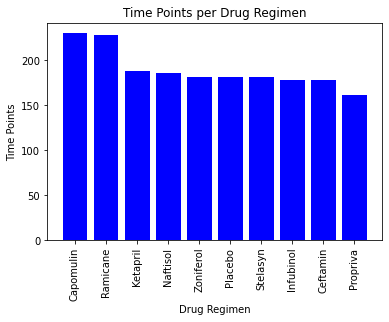

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Get x and y axis values
x_axis = data_df["Drug Regimen"].value_counts().index
y_axis = data_df["Drug Regimen"].value_counts()

# Plot bar graph
plt.bar(x_axis, y_axis, color = "blue")
plt.xticks(rotation=90)
plt.title("Time Points per Drug Regimen")
plt.ylabel("Time Points")
plt.xlabel("Drug Regimen")
plt.show()

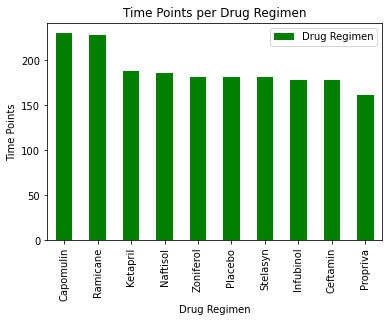

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drugs_timepoint_df = pd.DataFrame(data_df["Drug Regimen"].value_counts())
drugs_timepoint_df.plot(kind="bar", color="green")
plt.title("Time Points per Drug Regimen")
plt.ylabel("Time Points")
plt.xlabel("Drug Regimen")
plt.show()

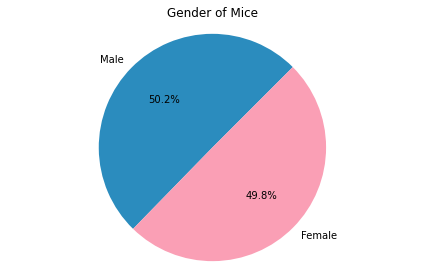

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas pyplot
gender_data = data_clean_df.value_counts("Sex")
gender_pandas_plot = gender_data.plot(kind="pie", y="", autopct='%1.1f%%', title="Gender of Mice", 
                                      startangle=45, colors=['#2b8cbe','#fa9fb5'])

# Remove ylabel
gender_pandas_plot.set_ylabel("")

plt.tight_layout()
plt.axis("equal")
plt.show()

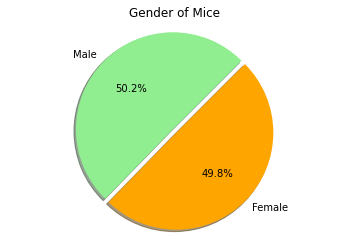

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Male", "Female"]
colors = ["lightgreen", "orange"]

fig1, ax1 = plt.subplots()
ax1.pie(gender_data, explode=(0,0.05), colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Gender of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Locate the tumor volume of each mouse of treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Capomulin"]
ramicane = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ramicane"]
infubinol = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Infubinol"]
ceftamin = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ceftamin"]


In [15]:
# Get tumor volume for each drug treatment
x_axis_capomulin = capomulin["Tumor Volume (mm3)"]
x_axis_ramicane = ramicane["Tumor Volume (mm3)"]
x_axis_infubinol = infubinol["Tumor Volume (mm3)"]
x_axis_ceftamin = ceftamin["Tumor Volume (mm3)"]


In [16]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens

# Calculate the quartiles for 4 drugs. 1stQuartile = 25%(lower IQR), 2ndQuartile = 50%(Median), 3rdQuartile = 75%(upper IQR)
quartiles_cap = x_axis_capomulin.quantile([0.25,0.5,0.75])
quartiles_cef = x_axis_ceftamin.quantile([0.25,0.5,0.75])
quartiles_inf = x_axis_infubinol.quantile([0.25,0.5,0.75])
quartiles_ram = x_axis_ramicane.quantile([0.25,0.5,0.75])

# Calculate IQR for 4 drugs
IQR_cap = quartiles_cap[0.75] - quartiles_cap[0.25]
IQR_cef = quartiles_cef[0.75] - quartiles_cef[0.25]
IQR_inf = quartiles_inf[0.75] - quartiles_inf[0.25]
IQR_ram = quartiles_ram[0.75] - quartiles_ram[0.25]

In [17]:
# Copy the aggregation dataframe above to calculate and draw graphs, reindex the new dataframe
drugs_stats = []
drugs_stats = agg_stats.reset_index(level=[0])

# Select data for the promising drugs: Capomulin, Ramicane, Infubinol, and Ceftamin 
drugs_stats = drugs_stats[drugs_stats["Drug Regimen"].isin(["Capomulin","Ramicane", "Infubinol","Ceftamin"])]

# Set drug regimen as table index of this new data frame
drugs_stats = drugs_stats.set_index("Drug Regimen")


In [18]:
# Place all stats of the selected drugs into a dataframe
drugs_stats['Minimum']= [x_axis_capomulin.min(),x_axis_ceftamin.min(),x_axis_infubinol.min(),x_axis_ramicane.min()]
drugs_stats['1stQuartile']= [quartiles_cap[0.25],quartiles_cef[0.25],quartiles_inf[0.25],quartiles_ram[0.25]]
drugs_stats['3rdQuartile']= [quartiles_cap[0.75],quartiles_cef[0.75],quartiles_inf[0.75],quartiles_ram[0.75]]
drugs_stats['Maximum']= [x_axis_capomulin.max(),x_axis_ceftamin.max(),x_axis_infubinol.max(),x_axis_ramicane.max()]
drugs_stats['IQR']= [IQR_cap,IQR_cef,IQR_inf,IQR_ram]

# Reshuffle the order of columns
drugs_stats_table = drugs_stats.reindex(["Capomulin","Ramicane","Infubinol", "Ceftamin"])
drugs_stats_table


,Mean,Median,VAR,STD,SEM,Minimum,1stQuartile,3rdQuartile,Maximum,IQR
Drug Regimen,,,,,,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038,23.343598,32.377357,40.159220,47.685963,7.781863
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308,22.050126,31.560470,40.659006,45.220869,9.098537
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591,36.321346,54.048608,65.525743,72.226731,11.477135
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114,45.000000,48.722078,64.299830,68.923185,15.577752


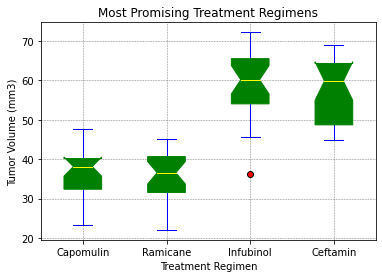

In [19]:
# Plotting & formatting graph with customised the box, whisker, outlier, median
fig1, ax1 = plt.subplots()
ax1.boxplot([x_axis_capomulin, x_axis_ramicane, x_axis_infubinol, x_axis_ceftamin],
            patch_artist=True,
            notch=True,
            whiskerprops=dict(color="blue"),
            medianprops=dict(color="yellow"),
            boxprops=dict(facecolor="green", color="green"),
            capprops=dict(color="blue"),
            flierprops=dict(markerfacecolor='r', markeredgecolor="black", marker='o')
           )

labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.title("Most Promising Treatment Regimens")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatment Regimen')
ax1.set_xticklabels(labels)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

## Line and Scatter Plots

In [20]:
# Display a list of mice treated with capomulin so a mouse ID can be selected to draw line graph

capomulin_mice = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Capomulin"]
print(f"\033[1m\033[46mBelow is a list of all mice that had been treated by Capomulin: \n\033[0m")
print("\033[94m" + capomulin_mice[["Drug Regimen","Mouse ID", "Weight (g)"]].to_string(index=False) + "\033[0m")


Below is a list of all mice that had been treated by Capomulin: 

Drug Regimen Mouse ID  Weight (g)
   Capomulin     s185          17
   Capomulin     x401          15
   Capomulin     m601          17
   Capomulin     f966          17
   Capomulin     u364          17
   Capomulin     y793          17
   Capomulin     r554          17
   Capomulin     m957          19
   Capomulin     t565          17
   Capomulin     i738          20
   Capomulin     w914          21
   Capomulin     g288          19
   Capomulin     l897          19
   Capomulin     b742          21
   Capomulin     b128          22
   Capomulin     j246          21
   Capomulin     j119          23
   Capomulin     w150          23
   Capomulin     v923          21
   Capomulin     g316          22
   Capomulin     s710          23
   Capomulin     l509          21
   Capomulin     r944          25
   Capomulin     i557          24
   Capomulin     r157          25


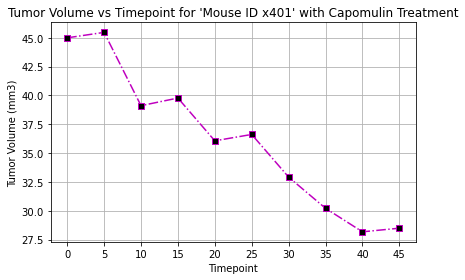

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select a mouse with ID = x401 (based on the capomulin_mice table above)
x_axis = data_df.loc[data_df["Mouse ID"] == "x401"]
y_axis = data_df.loc[data_df["Mouse ID"] == "x401"]

# Get x and y axis values
x_axis = x_axis["Timepoint"]
y_axis = y_axis["Tumor Volume (mm3)"]

#Ploting line graph with title and labels
plt.title("Tumor Volume vs Timepoint for 'Mouse ID x401' with Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.tight_layout()

# set range of values for xticks
plt.xticks(np.arange(min(x_axis),max(x_axis) +1,5))
plt.plot(x_axis, y_axis, linestyle='-.', marker='s', markerfacecolor='black', color='m')

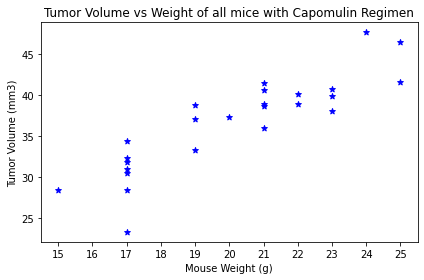

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Calculate average volume and weight for mice with capoline treatment
capo_mouse_mean = capomulin_mice.groupby(["Mouse ID"])["Weight (g)"].mean()
capo_mouse_weight = capo_mouse_mean.values

capo_mouse_tumor_mean = capomulin_mice.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
capo_mouse_tumor_vol = capo_mouse_tumor_mean.values

# Scatter plot
plt.scatter(capo_mouse_weight, capo_mouse_tumor_vol, marker="*",color="blue")

# Label & title the graph
plt.title("Tumor Volume vs Weight of all mice with Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# set range of values for xticks
plt.xticks(np.arange(min(capo_mouse_weight),max(capo_mouse_weight)+1,1.0))
plt.tight_layout()
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

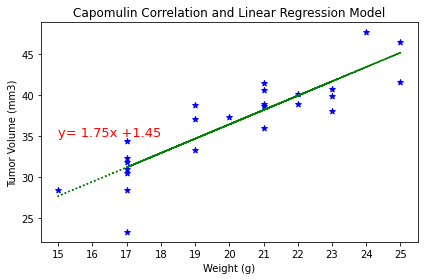

The correlation between mouse weight and tumor volume is 0.8767


In [24]:
# Plot scatter graph
plt.scatter(capo_mouse_weight, capo_mouse_tumor_vol, marker="*",color="blue") 

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_mouse_weight, capo_mouse_tumor_vol) 
regress_val = capo_mouse_weight * slope + intercept
plt.plot(capo_mouse_weight, regress_val, "g:") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (15,35), fontsize=13, color="red")

# Label & title the graph
plt.title("Capomulin Correlation and Linear Regression Model") 
plt.xlabel("Weight (g)") 
plt.ylabel("Tumor Volume (mm3)")

# set range of values for xticks
plt.xticks(np.arange(min(capo_mouse_weight),max(capo_mouse_weight)+1,1.0))
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment
data_correlation = st.pearsonr(capo_mouse_weight, capo_mouse_tumor_vol)
print(f"\033[43m\033[1mThe correlation between mouse weight and tumor volume is {round(data_correlation[0],4)}\033[0m")
